<a href="https://colab.research.google.com/github/Rishad1999/ImageProcessing_Assignment2_EG_2019_3722/blob/main/ImageProcessing_A2_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

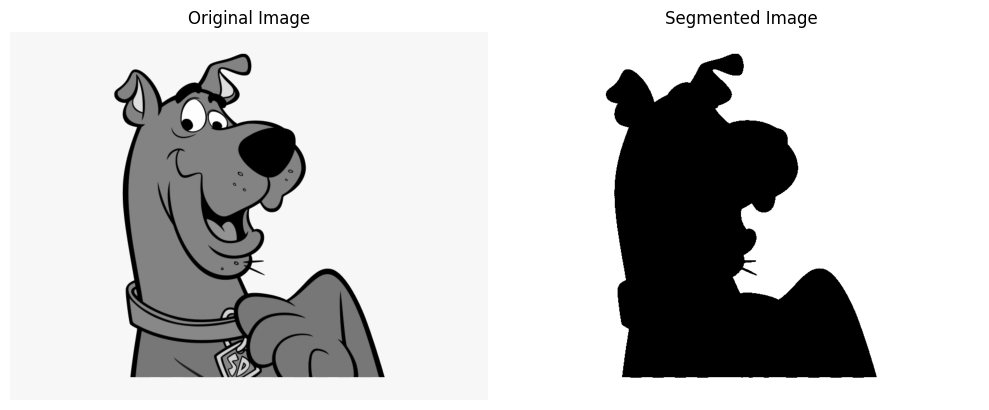

In [58]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#We're using region growing to split an image into parts based on similarities.
#It starts from seed points and expands regions by comparing pixel intensities within a threshold.
#This method is useful for tasks like object identification or analyzing images
#in fields such as medicine or satellite imagery.


def region_growing_4_neighbors(image, initial_seeds, threshold):
    height, width = image.shape

    # Initializing the segmented output image
    segmented = np.zeros_like(image, dtype=bool)
    pixel_queue = list(initial_seeds)

    # Processing the pixels
    while pixel_queue:
        x, y = pixel_queue.pop(0)
        # Mark the current pixel as segmented
        segmented[x, y] = True

        # Check the 4-connected neighbors
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy

            if 0 <= nx < height and 0 <= ny < width:
                if not segmented[nx, ny] and abs(int(image[nx, ny]) - int(image[x, y])) <= threshold:
                    segmented[nx, ny] = True
                    pixel_queue.append((nx, ny))

    return segmented

input_image = cv2.imread('/content/Scoobi.png', 0)

# Define initial seed points and threshold
initial_seeds = [(40,40)]
threshold = 5

# Performing region growing segmentation
segmented_image = region_growing_4_neighbors(input_image, initial_seeds, threshold)

# Convert the boolean array to an image to visualize the result
result_image = (segmented_image * 255).astype(np.uint8)

# Plot the original and segmented images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
|